[View in Colaboratory](https://colab.research.google.com/github/harvinder-power/sea-eagle-be/blob/master/pneumonia_vs_normal.ipynb)

In [1]:
!pip install kaggle
!apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


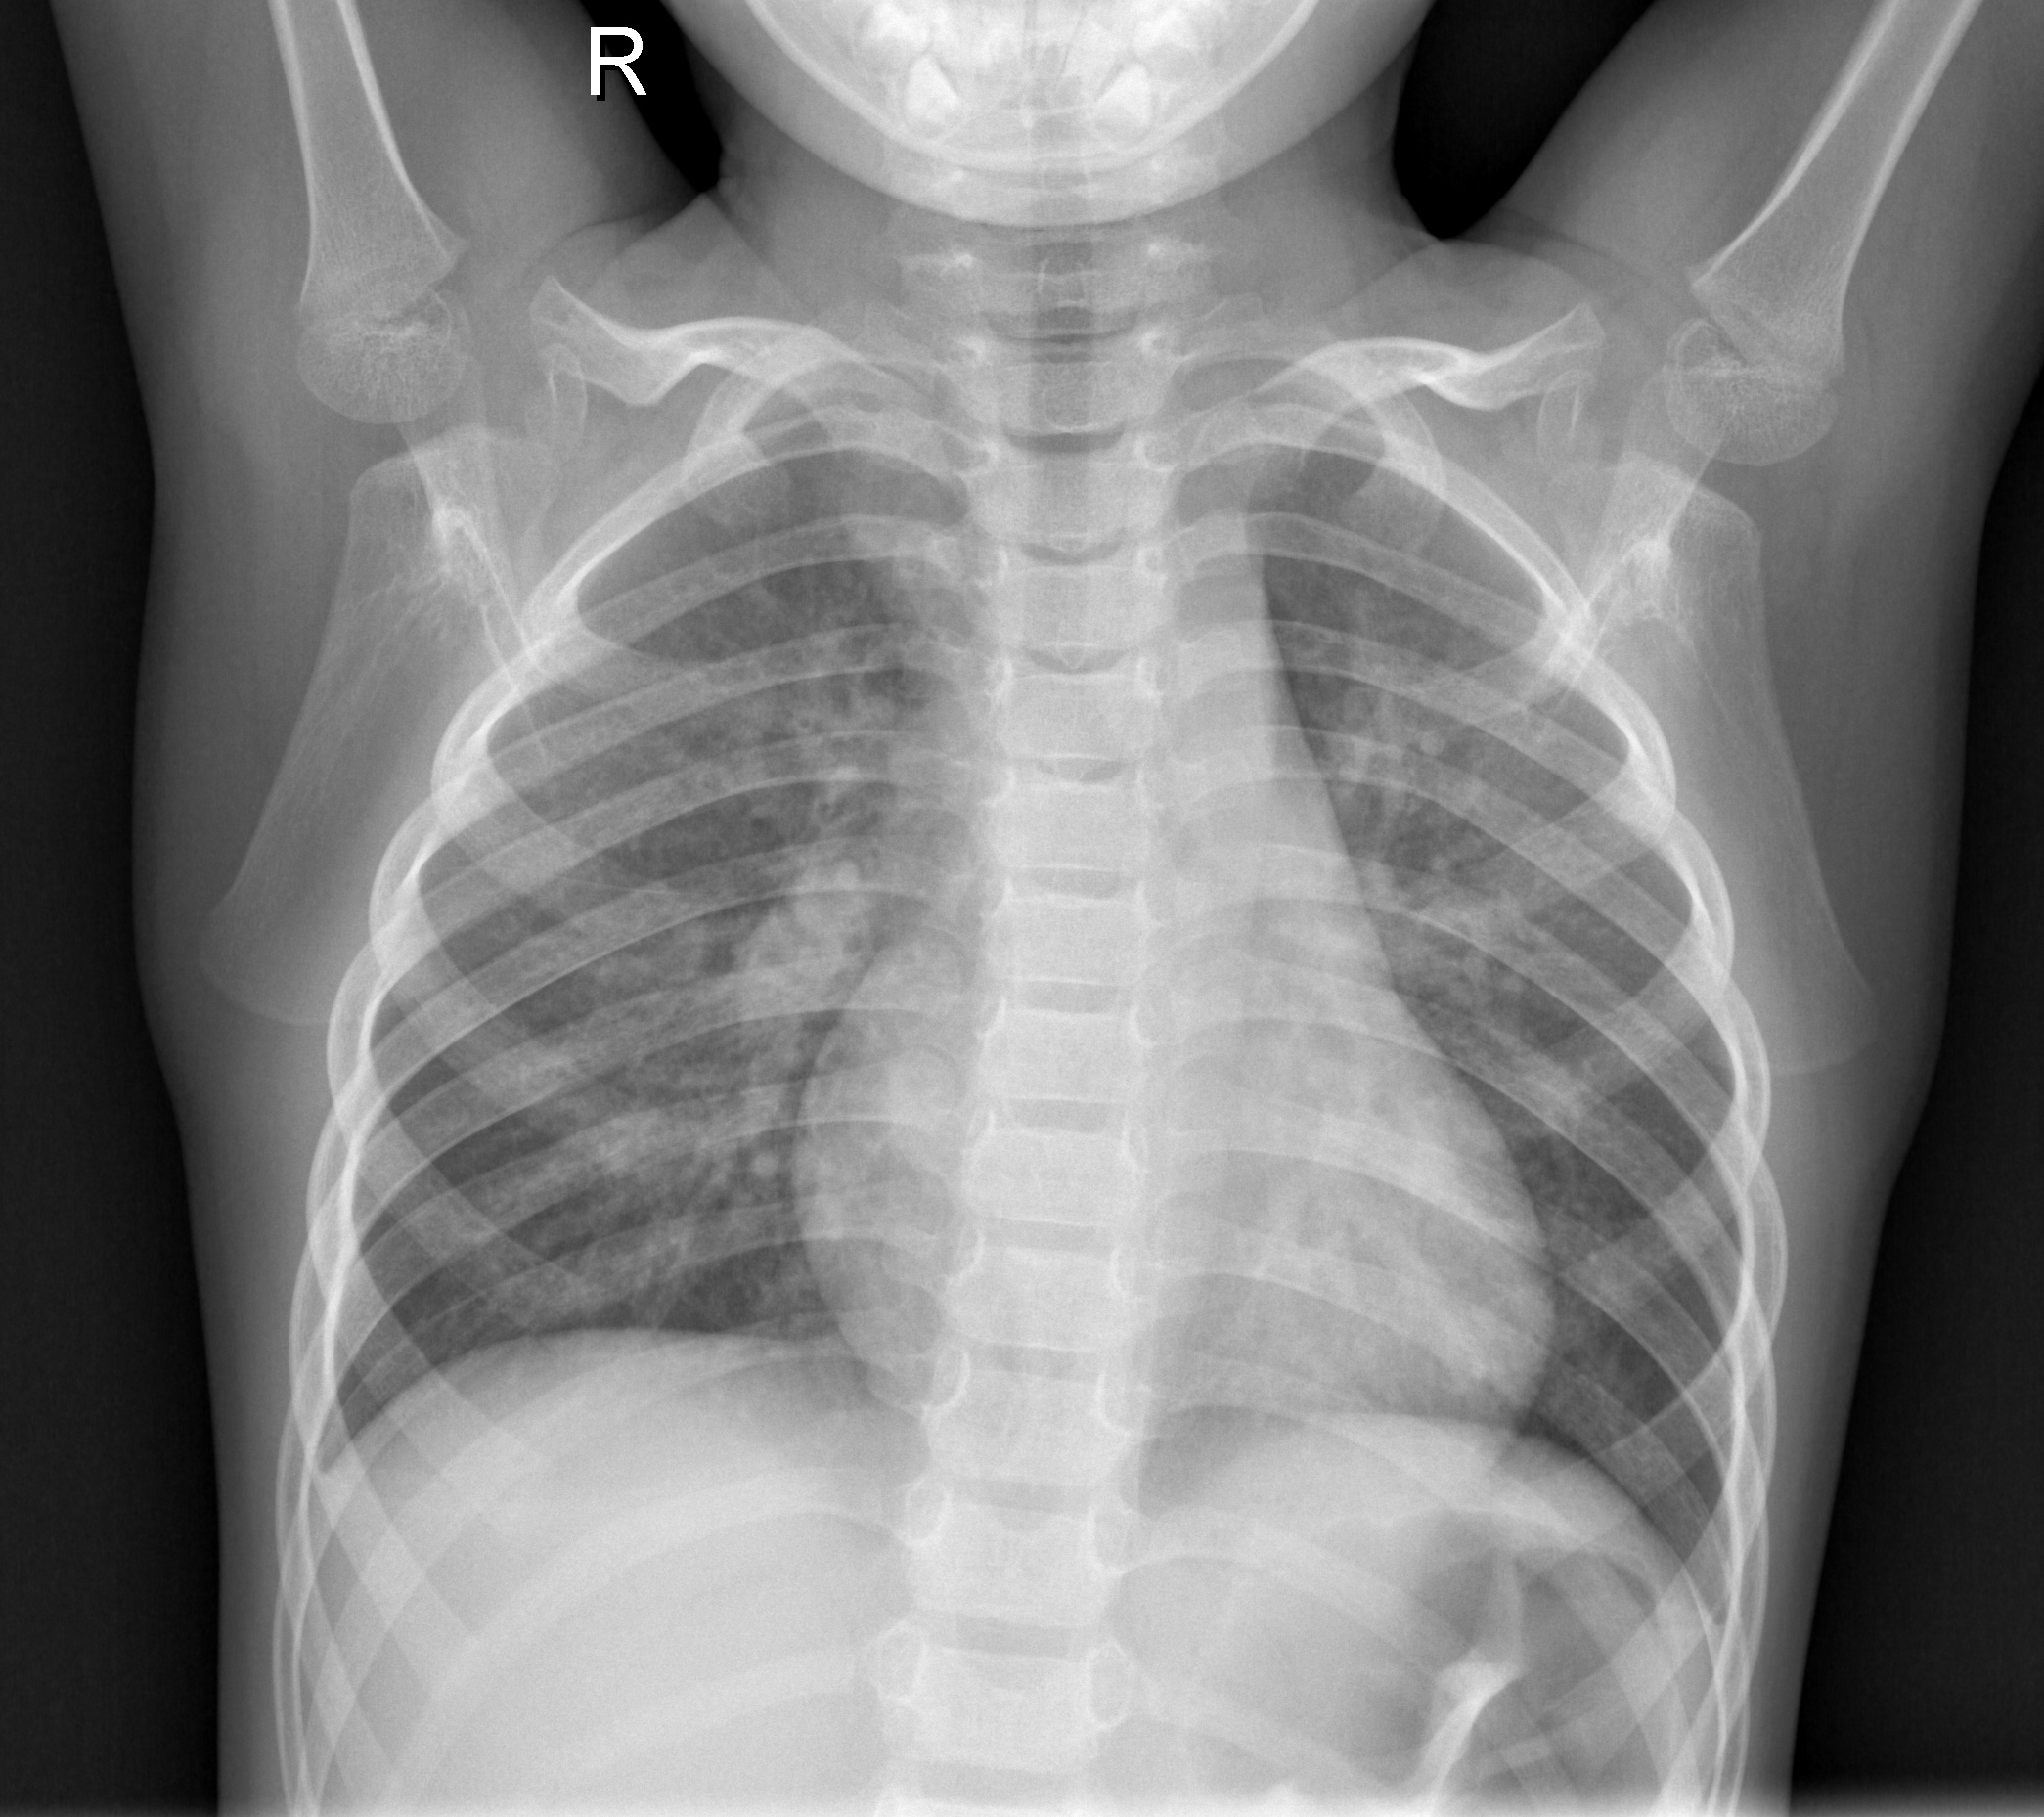

In [49]:
from PIL import Image
Image.open('IM-0115-0001.jpeg')

In [3]:
pwd

'/content'

In [5]:
!unzip chest_xray.zip

Archive:  chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUM

In [6]:
ls

ARXIV_V5_CHESTXRAY.pdf    images_001.zip  images_011.zip
BBox_List_2017.csv        images_002.zip  images_012.zip
chest_xray/               images_003.zip  LOG_CHESTXRAY.pdf
chest-xray-pneumonia.zip  images_004.zip  __MACOSX/
chest_xray.zip            images_005.zip  README_CHESTXRAY.pdf
Data_Entry_2017.csv       images_006.zip  sample_data/
data.zip                  images_007.zip  test_list.txt
FAQ_CHESTXRAY.pdf         images_008.zip  train_val_list.txt
image_dataset/            images_009.zip
images/                   images_010.zip


In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99%|█████████████████████████████████████▋| 1.14G/1.15G [00:18<00:00, 61.0MB/s]
100%|██████████████████████████████████████| 1.15G/1.15G [00:18<00:00, 66.3MB/s]


In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 128, 128

train_data_dir = '/content/chest_xray/train'
validation_data_dir = '/content/chest_xray/val'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Using TensorFlow backend.


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 45s 357ms/step - loss: 0.6225 - acc: 0.7430 - val_loss: 0.8953 - val_acc: 0.5000
Epoch 2/50
125/125 [==============================] - 41s 329ms/step - loss: 0.4610 - acc: 0.8005 - val_loss: 0.6857 - val_acc: 0.6250
Epoch 3/50
125/125 [==============================] - 41s 331ms/step - loss: 0.3263 - acc: 0.8650 - val_loss: 0.2501 - val_acc: 0.8750
Epoch 4/50
125/125 [==============================] - 41s 328ms/step - loss: 0.2980 - acc: 0.8900 - val_loss: 0.3397 - val_acc: 0.8750
Epoch 5/50
125/125 [==============================] - 41s 329ms/step - loss: 0.2734 - acc: 0.9025 - val_loss: 0.2619 - val_acc: 0.8750
Epoch 6/50
125/125 [==============================] - 41s 328ms/step - loss: 0.2738 - acc: 0.8915 - val_loss: 0.8114 - val_acc: 0.5000
Epoch 7/50
125/125 [==============================] - 41s 324ms/step - loss: 0.2373 - acc: 0.9160 - val_loss

KeyboardInterrupt: ignored

In [8]:
from keras.applications.densenet import DenseNet121
img_width, img_height = 256, 256
model = DenseNet121(include_top=True, weights=None, input_shape=(img_width,img_height,3), classes=2)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import preprocess_input

train_datagen = ImageDataGenerator(
    #rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True, 
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    '/content/chest_xray/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')
    #color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
    '/content/chest_xray/test',
    target_size=(img_height, img_width),
    batch_size=batch_size, #val_batch_size,
    class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True), metrics=['accuracy'])

Epoch 1/3
32/32 [==============================] - 54s 2s/step - loss: 0.0805 - acc: 0.9717 - val_loss: 5.7409 - val_acc: 0.6270
Epoch 2/3
32/32 [==============================] - 54s 2s/step - loss: 0.0617 - acc: 0.9795 - val_loss: 2.6157 - val_acc: 0.6647
Epoch 3/3
32/32 [==============================] - 54s 2s/step - loss: 0.0846 - acc: 0.9775 - val_loss: 8.9367 - val_acc: 0.4018


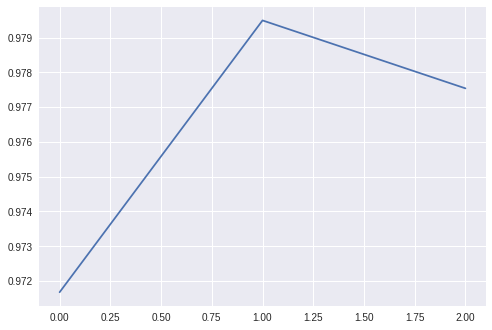

In [23]:
nb_train_samples = 300 #16188 #8094 #3036 #18046 #111589 #113243 #139987 
nb_validation_samples= 336 
epochs = 3 #int(nb_train_samples/batch_size)*3
history = model.fit_generator(
    train_generator,
    steps_per_epoch=batch_size, #nb_train_samples/batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=batch_size, #nb_validation_samples/batch_size, #val_batch_size,
    verbose=1)

pyplot.plot(history.history['acc'])
pyplot.show()

model.save('first_try_model.h5')
model.save_weights('first_try_weights.h5')

In [0]:
import matplotlib.pyplot as pyplot

'/content'

In [21]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving normal.jpg to normal.jpg
User uploaded file "normal.jpg" with length 188395 bytes


In [34]:
#NOTE - Unlikely that this assessment of the 

from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("first_try_model.h5")

    # image path
    img_path = '/content/pneumonia2.jpeg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)
    print (pred)

[[3.8461607e-05 9.9996150e-01]]


In [28]:
#Prediction for Normal 1
print (pred)

[[1.8934688e-19 1.0000000e+00]]


In [31]:
#Prediction for Normal 2
print (pred)

[[1.8514852e-18 1.0000000e+00]]


In [33]:
#Prediction for Pneumonia 1
print (pred)

[[2.007929e-18 1.000000e+00]]


In [35]:
#Prediction for Pneumonia 2
print (pred)

[[3.8461607e-05 9.9996150e-01]]
